In [12]:
!pip install pandas statsmodels matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00m eta 0:00:010:01:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.0 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
ice_cream_interest = pd.read_csv('ice_cream_interest.csv')

ice_cream_interest['month'] = pd.to_datetime(ice_cream_interest.month, yearfirst=True, format='%Y-%m')
ice_cream_interest.set_index('month', inplace=True)

ice_cream_interest = ice_cream_interest.asfreq(pd.infer_freq(ice_cream_interest.index))
ice_cream_interest.head()



,interest
month,
2004-01-01,13
2004-02-01,15
2004-03-01,17
2004-04-01,19
2004-05-01,22


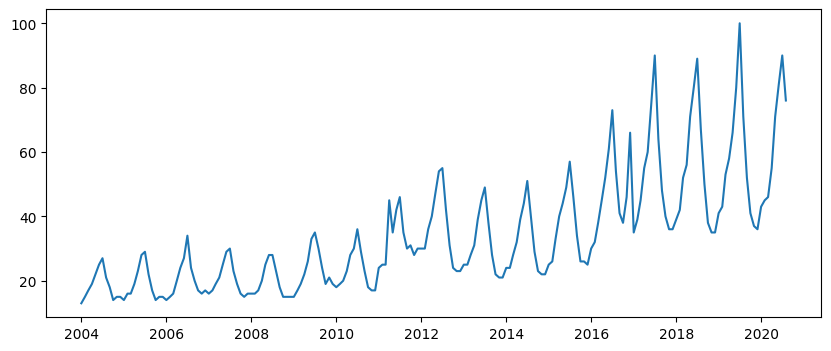

In [6]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)

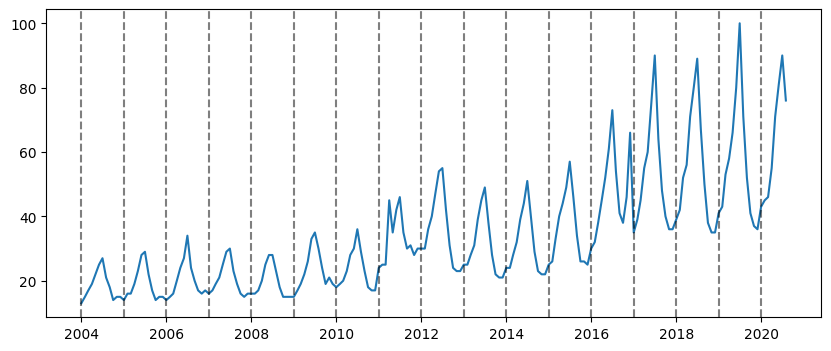

In [5]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

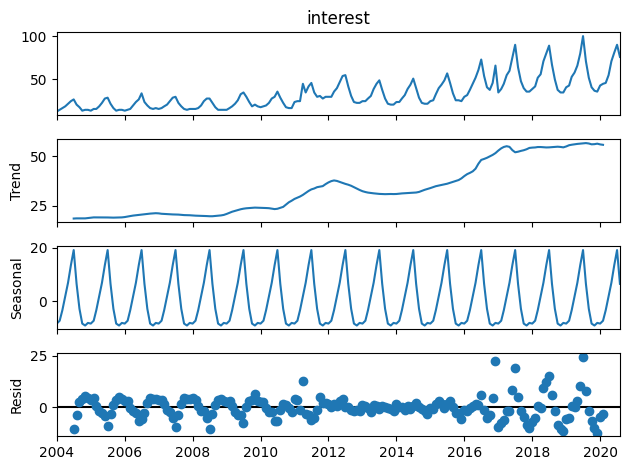

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ice_cream_interest['interest'],model='additive', period=12)
ax=res.plot()
plt.show()

In [9]:
from statsmodels.tsa.seasonal import STL 
result = STL(ice_cream_interest['interest'],seasonal=13,period=12).fit()

#ax=res.plot() 
#plt.show()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

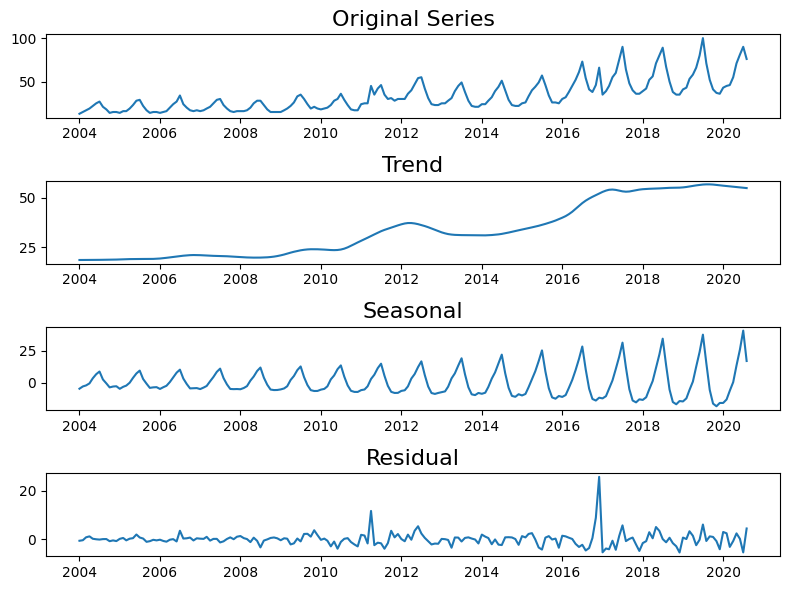

In [10]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(ice_cream_interest)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

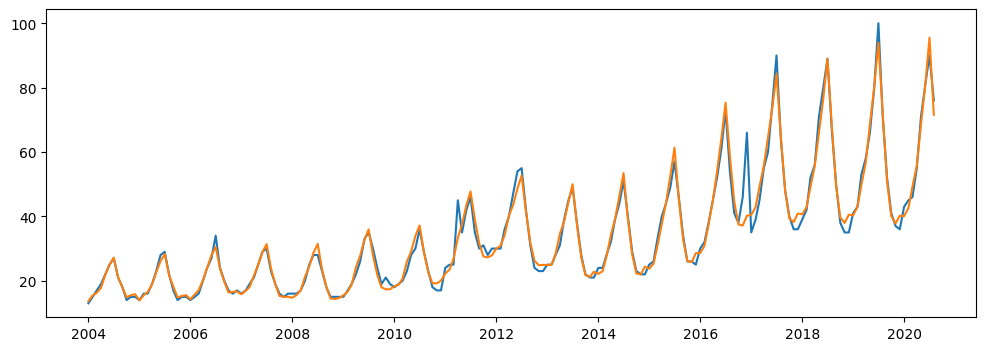

In [12]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(ice_cream_interest)
plt.plot(estimated)

In [45]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(12296.0, 18597.0)

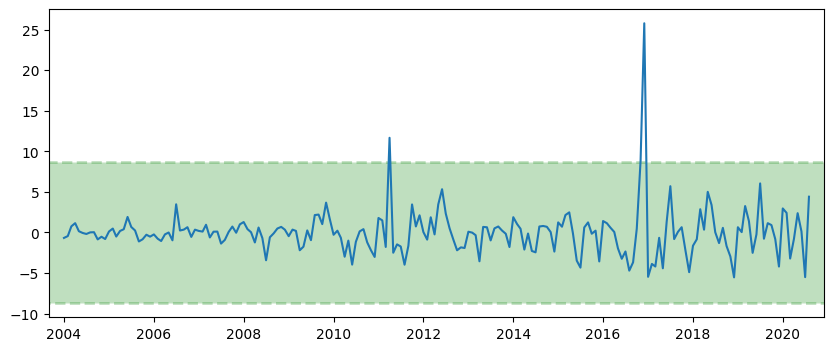

In [46]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2003,1,1), datetime(2021,8,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2003,9,1), datetime(2020,12,1))

In [47]:
anomalies = ice_cream_interest[(resid < lower) | (resid > upper)]

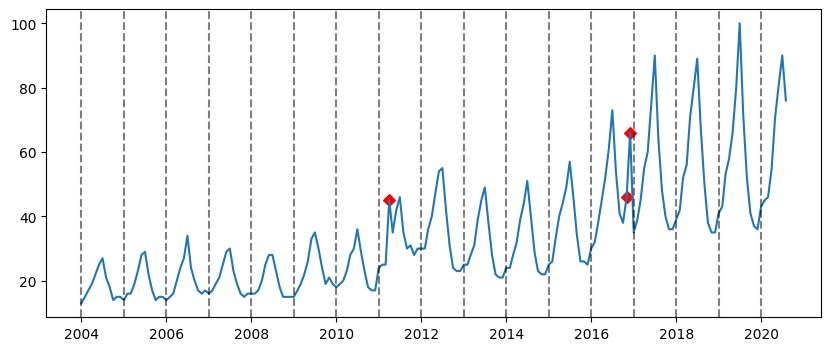

In [48]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.interest, color='r', marker='D')

In [49]:
anomalies

,interest
month,
2011-04-01,45
2016-11-01,46
2016-12-01,66
